#Clustering

It refers to the task of partioning the dataset into groups, called clusters. This partion is done in a way that elements in the same cluster are similar and elements of the different clusters are different.

There are a number of clustering techniques, one of them is k-means. In this module we will see how to use k-means on a real world dataset.

k-means clustering helps in coming up with k-clusters (groups) in an unlabelled dataset.

The following steps are included in the algorithm-


1.   Start with k data points (centroid)
2.   Find the distance of all the points from these centroids.
3. Allocate all to points to 1 group that are closer to a particular centroid forming k-clusters
4. Recompute the centroid for each cluster.
5. Repeat 3 and 4 till until the distance between the old clusters and new clusters is constant.



### Using k-means for artificial data.

In [1]:
#importing libraries
import statistics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
#generating the artificial dataset
X_a, y_a = make_blobs(n_samples=200, centers=3,
                       cluster_std=0.5, random_state=0)


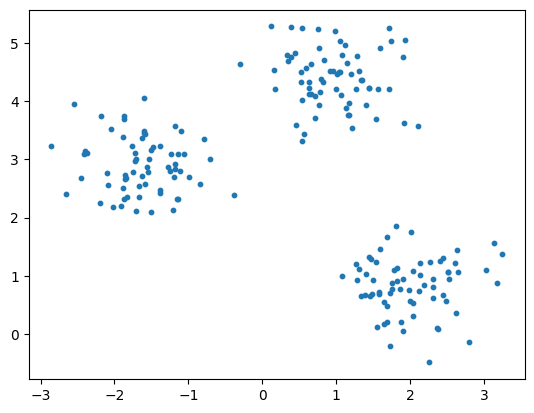

In [3]:
# plotting the data
plt.scatter(X_a[:, 0], X_a[:, 1], s=10)
plt.show()

In [4]:
#pre-processing the data
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X_a)

In [5]:
kmeans = KMeans(
        init="random",
        n_clusters=3,
        n_init=50,
        max_iter=500,
        random_state=0)

In [6]:
kmeans.fit(scaled_X)

KMeans(init='random', max_iter=500, n_clusters=3, n_init=50, random_state=0)

In [7]:
# The SSE value
print(kmeans.inertia_)

38.05406829425628


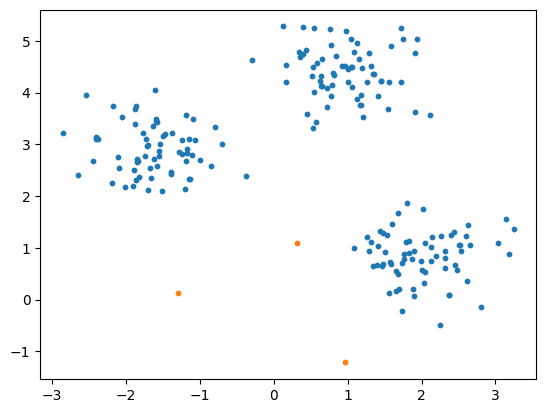

In [8]:
# The three centroids in this case
C=kmeans.cluster_centers_

# plotting them with data
plt.scatter(X_a[:, 0], X_a[:, 1], s=10)
plt.scatter(C[:, 0], C[:, 1], s=10)
plt.show()

In [9]:
kmeans_kwargs = {
        "init": "random",
        "n_init": 50,
        "max_iter": 500,
        "random_state": 0,
    }


sse = []
for k in range(1,10):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_X)
  sse.append(kmeans.inertia_)

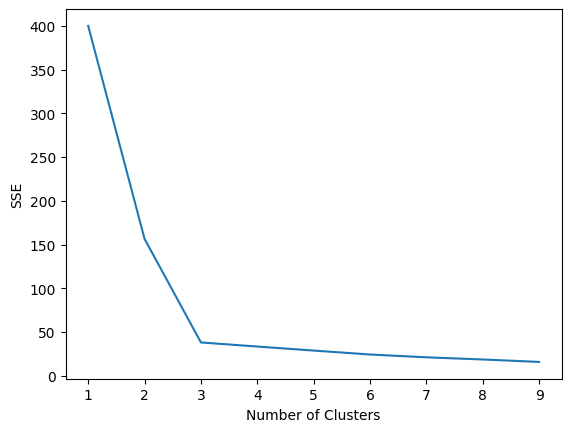

In [10]:
plt.plot(range(1, 10), sse)
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

From the chart above it can be observed that the elbow is formed at n=3, hence the optimal number of clusters should be 3

There is another way to identify the optimal number of clusters and that is through a measure called silhouette coefficient. This coefficient clusters the points using two parameters-

1.   Proximity of points in the same clusters
2.   The remoteness of points in different clusters.

The range of this coefficient is from -1 to 1. Higher score implis that the data points are closer to their centroids.



In [11]:
sil_coef = []
for k in range(2, 10):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_X)
  score = silhouette_score(scaled_X, kmeans.labels_)
  sil_coef.append(score)

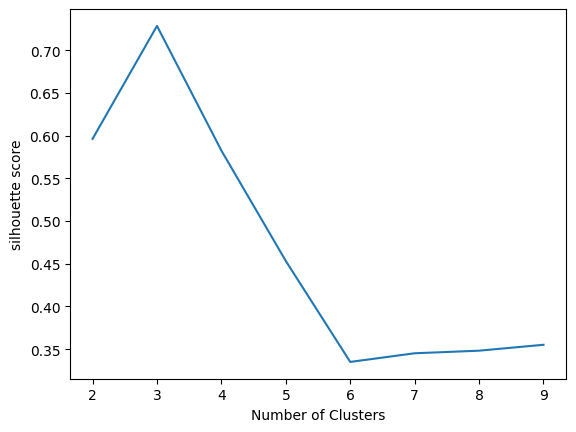

In [12]:
plt.plot(range(2, 10), sil_coef)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette score")
plt.show()

Since the sil_coef obtains maximum value for n=3, hence we choose k=3.

### Real data set

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()

In [14]:
#Identifying the correct number of clusters

kmeans_kwargs = {
        "init": "random",
        "n_init": 50,
        "max_iter": 500,
        "random_state": 0,
    }


sse_digit = []
for k in range(1,12):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(digits.data)
  sse_digit.append(kmeans.inertia_)



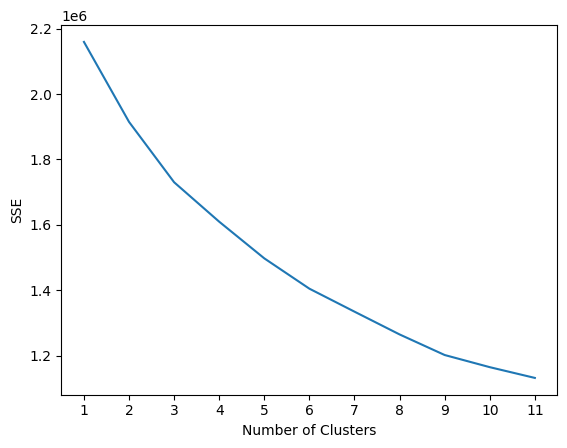

In [15]:
plt.plot(range(1, 12), sse_digit)
plt.xticks(range(1, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

NO clear elbow is seen

In [16]:
sil_coef_digits = []
for k in range(2, 15):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(digits.data)
  score = silhouette_score(digits.data, kmeans.labels_)
  sil_coef_digits.append(score)

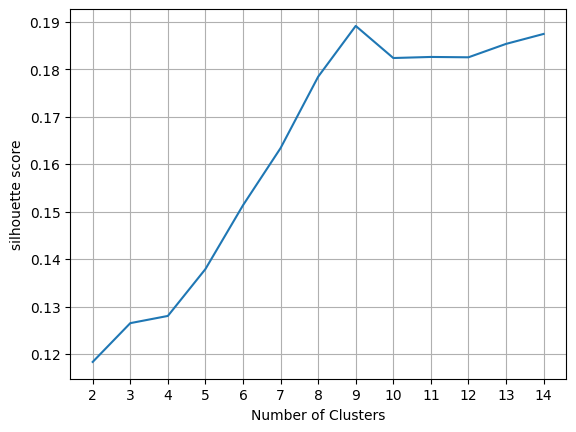

In [17]:
plt.plot(range(2, 15), sil_coef_digits)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette score")
plt.grid(True)
plt.show()

In [18]:
# get the value of K for which
# sillhoutte coefficient is highest
print(np.argmax(sil_coef_digits)+2)

9


This graph points the fact that n=9 this could be because some of the digits like 1 and 7 make have striking similarity.

In [19]:
# k-means for k=10 as there are 10 digits

kmeans = KMeans(n_clusters=10, **kmeans_kwargs)
kmeans.fit(digits.data)

# obtaining centroids
C_digit=kmeans.cluster_centers_


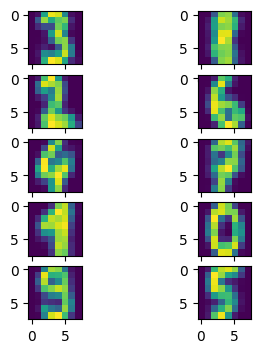

In [20]:
# displaying centroids
fig, ax = plt.subplots(5, 2, figsize=(4, 4))
C_digit_reshaped=C_digit.reshape(10,8, 8)
for i,j in zip(ax.flat, C_digit_reshaped):

  i.imshow(j)

In [21]:
#model evaluation
labels=np.zeros_like(digits.target)
for i in range(10):
  c=(kmeans.labels_==i)
  labels[c]=(statistics.mode(digits.target[c]))
print(accuracy_score(digits.target, labels))
#confusion matrix
c_m = confusion_matrix(digits.target, labels)
print(c_m)

0.7924318308291597
[[177   0   0   0   1   0   0   0   0   0]
 [  0  55  24   1   0   1   2   0  99   0]
 [  1   2 148  13   0   0   0   3   8   2]
 [  0   0   0 154   0   2   0   7   7  13]
 [  0   7   0   0 162   0   0   9   3   0]
 [  0   0   0   0   2 136   1   0   0  43]
 [  1   1   0   0   0   0 177   0   2   0]
 [  0   2   0   0   0   0   0 175   2   0]
 [  0   6   3   2   0   4   2   5 101  51]
 [  0  20   0   6   0   6   0   7   2 139]]


In [22]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])